# 1.0 About the Author
I'm Amna Sabahat, a passionate Machine Learning Engineer dedicating to mastering machine learning algorithms. let's grow together!

To know more about me, Click here [LinkedIn](http:/linktr.ee/amna_sabahat) 

Feel free to connect and reach me out for any Collaborations!



# 2.0 Project Description
## Project title:
Cracking Sentimental Analysis of Twitter using CNN

## Description:
This notebook contains "Sentimental Analysis of Tweets" focuses on Classifying the sentiments of Tweets. Leveraging the power of Convolutional Neural Networks, mainly aim to predict whether the tweet expresses is positive or negative sentiment.

## Objective:
The primary objective of this notebook is to develop an efficient binary classification model that can categorize tweets into positive or negative sentiments. The specific goals include:

### Data Preprocessing:
Clean and preprocess the raw tweet data, including tokenization, stop word removal, and text normalization etc.

###  Feature Engineering: 
Transform the text data into numerical representations suitable for input into the CNN model.

###  Model Building:
Construct and train an CNN model optimized for text data to perform the binary classification task.

###  Evaluation: 
Assess the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

###  Visualization: 
Provide clear and insightful visualizations of the results to interpret the model's effectiveness and areas for improvement.

# 3.0 Importing Libraries & Data Cleaning 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
import emoji
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 3.1 loading the Dataset 

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/tweets-sentiments/sentiment_tweets3.csv')

In [3]:
# Display the first 5 rows
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# 4.0 Data Preprocessing Steps:

In [4]:
df.shape

(10314, 3)

# 4.1 Checking Null Values

In [5]:
print(df.isnull().sum())
df.head()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64


,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df.columns = ['Index','sentiments', 'label']
df.head()

,Index,sentiments,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# 4.2 Lowercase the Text

In [7]:
df['sentiments'] = df['sentiments'].str.lower()
df.head()

,Index,sentiments,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# 4.3 Remove HTML Tags

In [8]:
def remove_html(tweet):
    return re.sub(r'<.*?>', '', tweet)  # Remove HTML tags
df ['sentiments'] = df['sentiments'].apply(remove_html)

df.head()

,Index,sentiments,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# 4.4 Remove URLs

In [9]:
def remove_urls(tweet):
    return re.sub(r'http\S+|www\S+|https\S+', '', tweet) # remove urls
df ['sentiments'] = df['sentiments'].apply(remove_urls)

df.head()

,Index,sentiments,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0


# 4.5 Remove Punctuations

In [10]:
def remove_punctuation(tweet):
    return re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
df ['sentiments'] = df['sentiments'].apply(remove_punctuation)

df.head()

,Index,sentiments,label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


# 4.6 Handling ChatWords 

In [11]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
     "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
     "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Function to replace chat words with their full forms
def replace_chat_words(tweet):
    words = tweet.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['sentiments'] = df['sentiments'].apply(replace_chat_words) 

df.head()

,Index,sentiments,label
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorr...,0
4,540,add me on myspace myspacecomlookthunder,0


# 4.7 Handling Stope Words

In [12]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [13]:
# Function to preprocess sentiments
def preprocess_sentiments(text):
    tokens = text.split()  # Simple tokenization
    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)  # Join back into a string
df['sentiments'] = df['sentiments'].apply(preprocess_sentiments)
df.head()

,Index,sentiments,label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly ...,0
4,540,add myspace myspacecomlookthunder,0


# 4.8 Handling Emojis

In [14]:
def remove_emojis(tweet):
    return emoji.replace_emoji(tweet, replace='')


df['sentiments'] = df['sentiments'].apply(remove_emojis)

df.head()

,Index,sentiments,label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly ...,0
4,540,add myspace myspacecomlookthunder,0


# 4.9 Train Test Split

In [15]:
# Split the data into training and testing sets
X = df['sentiments']
y = df['label']  # Adjust the label column name if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



# 4.10 Tokenization & Padding Sequence

In [16]:

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [17]:
max_length = 50  # Choose max_length based on your data
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# 5.0 Model Building

In [18]:

 #Build CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))  # Binary classification

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5.1 Model Compiling 

In [19]:
# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 5.2 Model Training 

In [20]:


# Train the model
history_cnn = model_cnn.fit(X_train_padded, y_train, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8455 - loss: 0.3707 - val_accuracy: 0.9879 - val_loss: 0.0517
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9898 - loss: 0.0361 - val_accuracy: 0.9915 - val_loss: 0.0382
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9973 - loss: 0.0108 - val_accuracy: 0.9927 - val_loss: 0.0371
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9998 - loss: 0.0029 - val_accuracy: 0.9921 - val_loss: 0.0423
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 1.0000 - loss: 9.3194e-04 - val_accuracy: 0.9921 - val_loss: 0.0493


# 6.0 Model Prediction

In [21]:
# Predictions
y_pred = model_cnn.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype(int)



65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1611
           1       0.99      0.96      0.98       452

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063



In [23]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[1608    3]
 [  17  435]]


# 6.1 Plotting betwen Training & validation Accuracy Values

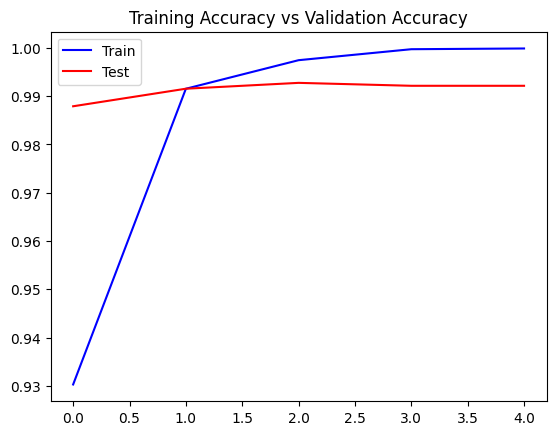

In [24]:
# Plotting training & validation accuracy values
plt.title('Training Accuracy vs Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], color='blue',label='Train')
plt.plot(history_cnn.history['val_accuracy'], color='red',label='Validation')

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



#  6.2 Plotting the graph between training loss & validation loss 

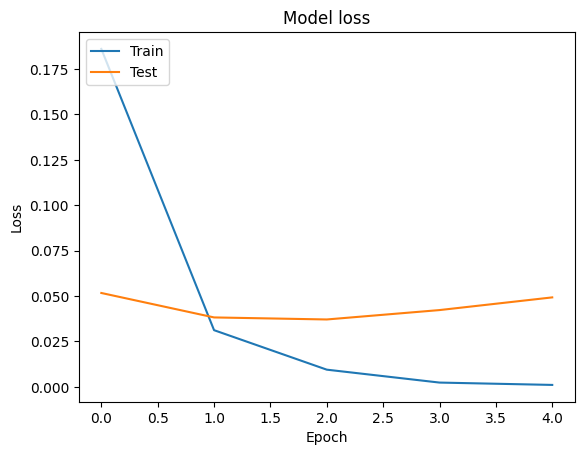

In [25]:
# Plotting training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7.0 Visualization 

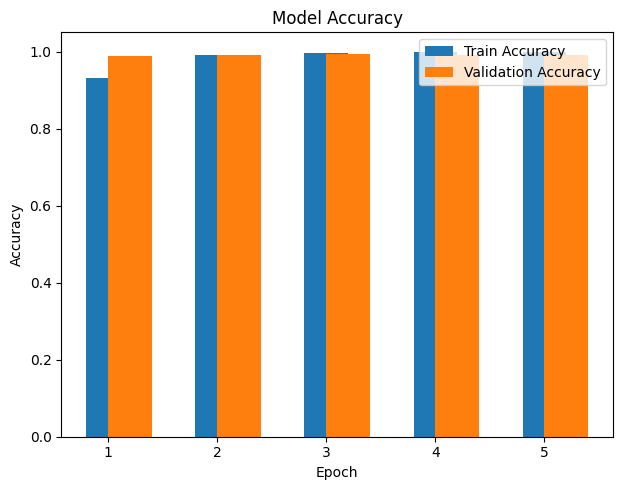

In [26]:
# Step 7: Visualization with Bar Charts

# Setting the number of epochs
epochs = range(1, len(history_cnn.history['accuracy']) + 1)

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

# Bar plot for accuracy
plt.subplot(1, 2, 1)
plt.bar(epochs, history_cnn.history['accuracy'], width=0.4, label='Train Accuracy', align='center')
plt.bar(epochs, history_cnn.history['val_accuracy'], width=0.4, label='Validation Accuracy', align='edge')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend()
plt.tight_layout()
plt.show()


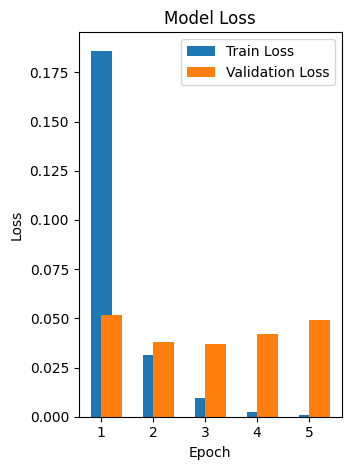

In [27]:
# Bar plot for loss
plt.subplot(1, 2, 2)
plt.bar(epochs, history_cnn.history['loss'], width=0.4, label='Train Loss', align='center')
plt.bar(epochs, history_cnn.history['val_loss'], width=0.4, label='Validation Loss', align='edge')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend()
plt.tight_layout()
plt.show()

# --------- The End---------